# **Modelo de Regresión Lineal Múltiple (Caso de uso: suicidios 2019)**
Un modelo de regresión lineal múltiple nos permite estudiar el comportamiento de una variable endógena, ***y*** , a partir de **k** variables independientes (***x1,x2,...,xk***) y un término aleatorio que recibe el nombre de perturbación aleatoria, **u**.

# Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
En este caso de uso, vamos a intentar explicar qué variables*(x1,x2,...,xk) pueden afectar al número de suicidios (*y) que ocurren en España. Para ello, hemos cogido datos,en su mayoría, del año 2019 y los hemos separado en Comunidades Autónomas, excluyendo las ciudades autónomas de Ceuta y Melilla.

In [ ]:
#Cargamos el dataset 
from google.colab import files
uploaded = files.upload() #subimos archivo DATASETSUIC2019 a Colab
datos = pd.read_excel('suicidios2019CCAA.xlsx')
datos.head() #Visualizamos el archivo cargado

Saving suicidios2019CCAA.xlsx to suicidios2019CCAA (2).xlsx


,ccaa,suic,habitantes,suicpercapita,deu_nec,ipc,defpc,def,gastoprotec,gastoprotecpc,gastoid,pibpc,paropc,paro,soc_cons,soc_conspc,v_genero,res_urbpc,res_urb,tur,turpc,ocu,inac,analf,paro_ld,m_cond,g_med
0,Andalucía,653,8414240,0.000078,52,104.060750,0.008653,72806,80123045,9.522315,1422969,19633,0.098583,829500,15560,0.001849,13,0.526162,4427256,12023153,1.428905,3119.7,3011.2,2.6,32.5,0.17,10603
1,Aragón,108,1319291,0.000082,37,104.218333,0.010688,14100,12859166,9.747028,312953,28727,0.051391,67800,1913,0.001450,1,0.493036,650458,544761,0.412920,587.6,450.1,0.7,28.4,0.13,12775
2,Asturias,128,1022800,0.000125,11,103.829583,0.012943,13238,56016655,54.767946,182514,23299,0.066680,68200,1164,0.001138,0,0.489766,500933,317860,0.310774,387.0,438.6,0.5,41.5,0.21,12318
3,Baleares,99,1149460,0.000086,16,104.147417,0.007139,8206,5774007,5.023234,113533,28213,0.092391,106200,3010,0.002619,1,0.833859,958487,13679781,11.901050,571.2,357.6,1.5,16.7,0.24,12766
4,Canarias,203,2153389,0.000094,10,103.707750,0.007574,16310,3000599,1.393431,220468,21244,0.110384,237700,3385,0.001572,8,0.618182,1331187,13146863,6.105197,905.9,756.5,1.6,34.0,0.26,9852


In [ ]:
datos.shape #tamaño del archivo

(17, 27)

# Ajuste del modelo (Representación gráfica)

Hemos pasado algunas variables a términos per cápita para evitar el efecto tamaño.  Cuando representemos el número de suicidios per cápita y el número de parados por CCAA tenemos que estandarizarlas o tipificar antes para que sean coherentes a la hora de representarlas gráficamente.  Para ello, tenemos que restar a la variable la media de la variable y dividirla entre la desviación típica.

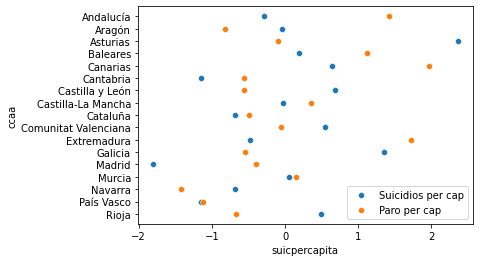

In [ ]:
x1 = datos['suicpercapita']
x2 = datos['paropc']
y = datos['ccaa']
x1_mu = x1.mean() #calculamos la media de suicidios pc
x1_sigma = x1.std() #calculamos la desviación típica
x2_mu = x2.mean()
x2_sigma = x2.std()
x1_std = (x1 - x1_mu) / x1_sigma #estandarizamos la variable 
x2_std = (x2 - x2_mu) / x2_sigma
_=sns.scatterplot(x=x1_std, y=y)
_=sns.scatterplot(x=x2_std, y=y)
plt.legend(['Suicidios per cap', 'Paro per cap'])
plt.show()


# Diagrama de dispersión

Un diagrama de dispersión usa una colección de puntos colocados usando coordenadas cartesianas para mostrar valores de dos variables. Muestra una variable en cada eje, por lo que se puede detectar si existe una relación o correlación entre ambas variables.

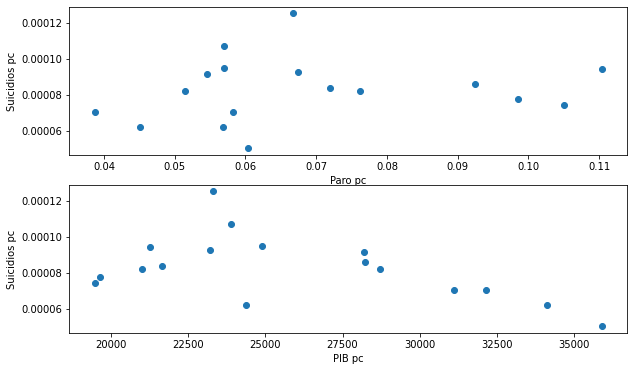

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = datos['paropc'], y = datos['suicpercapita'])
ax[0].set_xlabel("Paro pc")
ax[0].set_ylabel("Suicidios pc")

ax[1].scatter(x = datos['pibpc'], y = datos['suicpercapita'])
ax[1].set_xlabel("PIB pc")
ax[1].set_ylabel("Suicidios pc")

plt.show()

En nuestro caso, y a modo de ejemplo, ni "PIB pc" ni "Paro pc" tienen correlación con la variable "Suicidios pc", ya que los puntos están desordenados y no tienen ningún patrón a seguir.

# Heatmap

Un mapa de calor (heatmap) es una técnica de visualización de datos que mide la magnitud de un fenómeno en colores en dos dimensiones. En nuestro ejemplo, haremos un heatmap de todas las variables del modelo, para luego quedarnos con las que realmente nos importa.

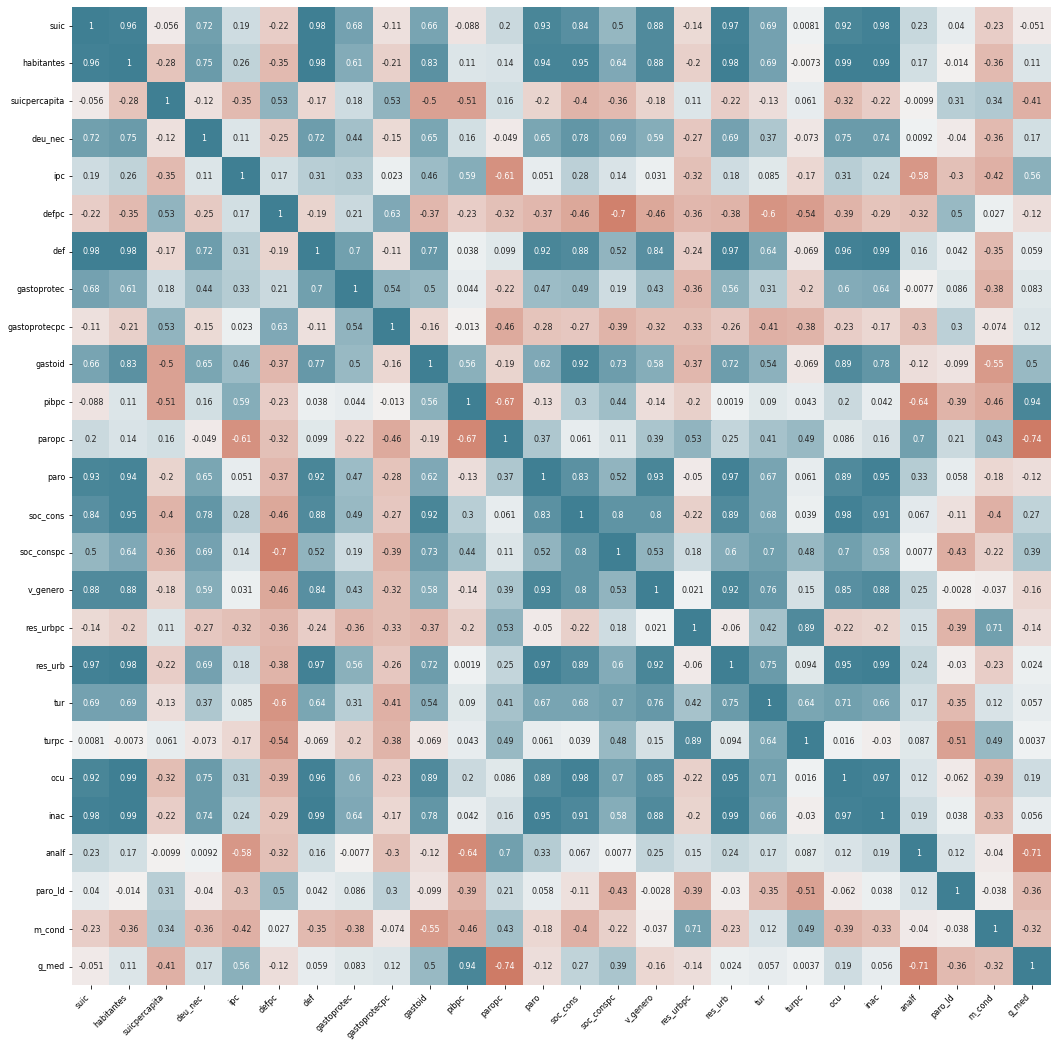

In [ ]:
corr_matrix=datos.corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

El modelo mide y muestra la interdependencia entre cada pareja de variables y todas al mismo tiempo. Podemos observar que las que tienen un color claro están más relacionadas unas con otras (obviando la diagonal principal que las variables se comparan con ellas mismas y obtienen el valor de 1). Se dice que dos variables están altamente correlacionadas si su valor ≥ 0,7.

La **matriz de coeficientes de correlación** es una tabla de doble entrada que muestra una lista multivariable horizontalmente y la misma lista verticalmente, con el correspondiente coeficiente de correlación “**r**” expresada con un número que va desde -1 a 1. 




# Regresión 


Hacemos una regresión lineal múltiple de las variables que no tiene el conocido "efecto tamaño" para ajustar nuestra regresión lo mejor posible. Nuestra variable independiente será el número de suicidios por CCAA, y como variables dependientes utilizaremos las variables "per cápita" (las que eliminan el efecto tamaño) que más correlación tienen según el Heatmap anterior.

In [ ]:
from sklearn.linear_model import LinearRegression

X = datos[["defpc","paropc","soc_conspc","res_urbpc","turpc"]] 
y = datos['suicpercapita']
reg =LinearRegression()
reg.fit(X,y) # ajuste del modelo

b0=round(reg.intercept_,4) # beta 0
b1=round(reg.coef_[0],4) # beta 1
b2=round(reg.coef_[1], 4) # beta 2
b3=round(reg.coef_[2],4)
b4=round(reg.coef_[3],4)
b5=round(reg.coef_[4],4)
r2=round(reg.score(X, y),4) # R^2



print('Beta 0=',b0,'\nBeta 1=',b1,'\nBeta 2=',b2,'\nBeta 3=',b3,'\nBeta 4=',b4,'\nBeta 5=',b5,'\nr^2   =',r2)

Beta 0= 0.0 
Beta 1= 0.0081 
Beta 2= 0.0002 
Beta 3= -0.0039 
Beta 4= -0.0001 
Beta 5= 0.0 
r^2   = 0.5155


Como podemos ver, y una vez realizada la regresión lineal, obtenemos unos resultados esperados con un nivel de explicación bastante bajo. Nuestro coeficiente de determinación es de 0,5155 por lo que no tenemos un modelo de calidad que explique bien el modelo. La constante Beta 0, y las Betas (b1,b2,b3,b4 y b5), apenas explican nada al modelo.
Podemos concluir que, el número de suicidios no tiene ninguna relación significante con las variables utilizadas en este modelo (defunciones, paro, sociedades constituidas en la CCAA, residuos urbanos y turismo).